# Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loan_application.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

Their are 614 rows and 13 columns in the dataset.

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Their are null values in many columns, we will convert them in further steps.

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Their are total 8 columns of object data type, 3 of float64 data type and 1 of int64 data type.

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We will replace the nan vaalues from all the columns one by one.

In [14]:
#Gender
from sklearn.impute import SimpleImputer

In [21]:
imp=SimpleImputer(strategy="most_frequent")
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))

In [22]:
df['Gender'].isnull().sum()

0

We replaced missing values from Gender column to Male as, it occurs most frequently in data set.We will repeat theprocess for some columns below.

In [23]:
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))

In [24]:
df['Married'].isnull().sum()

0

In [25]:
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))

In [27]:
df['Dependents'].isnull().sum()

0

In [28]:
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [29]:
df['Self_Employed'].isnull().sum()

0

In [30]:
imp_1=SimpleImputer(missing_values=np.nan,strategy='mean')

In [32]:
df['LoanAmount']=imp_1.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [33]:
df['LoanAmount'].isnull().sum()

0

In [34]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
df['Loan_Amount_Term']=imp_1.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [36]:
df['Loan_Amount_Term'].isnull().sum()

0

In [37]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

We will replace the nan by 0 for 'Credit_History' column.

In [38]:
df['Credit_History']=df['Credit_History'].replace(np.nan,0.0)

In [39]:
df['Credit_History'].isnull().sum()

0

In [40]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now,their are no missing values in the dataset.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

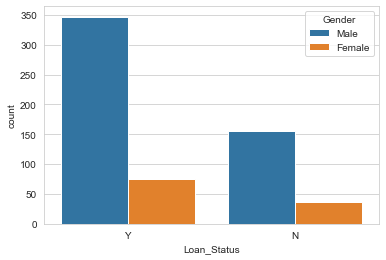

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Gender',data=df)

Loan is approved for male category is more as compair to female category. And the same for unapproved loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

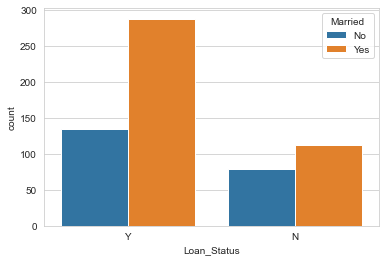

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Married',data=df)

Loan approval rate is high as well as low for Married category.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

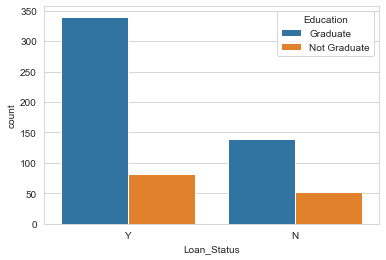

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Education',data=df)

Loan approval rate is high as well as low for Graduated category.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

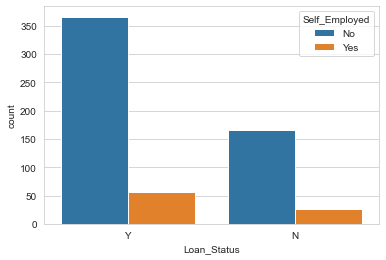

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df)

Loan approval and disapproval is high and low respectively for people who are not self-employed.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

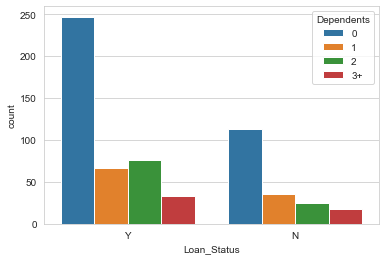

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Dependents',data=df)

Percentage of Loan Approval is high as well as low for people with o dependets.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

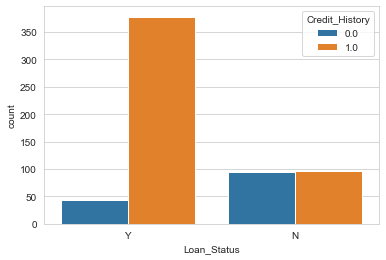

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Credit_History',data=df)

For credit history as 1, loan gets approved and percentage is also high, although it is nearly same for credit rating as 0 and 1 for loan disapproval.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

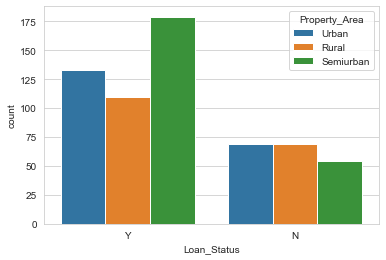

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Property_Area',data=df)

Loan approval rate is highest for Semiurban category as well as the lowest for disapproval.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

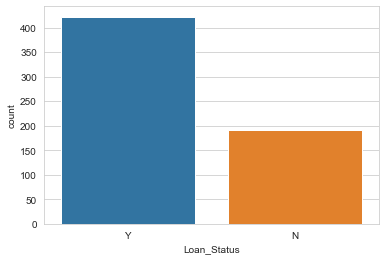

In [49]:
sns.countplot(df['Loan_Status'])

In [50]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Their is no class imbalance is here.

In [53]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.773616
std,6109.041673,2926.248369,84.037468,64.372489,0.418832
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


As other columns are of Object data type, we did not get statistical summary for other columns

In [55]:
from sklearn.preprocessing import LabelEncoder 

In [56]:
le=LabelEncoder()


In [58]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#We are going to drop Loan_Id column, as it just an id, we have other parameters.

In [59]:
df.drop('Loan_ID',axis=1,inplace=True)

In [60]:
df.shape

(614, 12)

In [61]:
List=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [62]:
for val in List:
    df[val]=le.fit_transform(df[val].astype(str))

In [63]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [64]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

We encoded all the data for further operation.

Statustical Summary

In [65]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.773616,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.418832,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Above is the statistical summary of the dataset which tells us about mean, median, std. of each column individually.

Correlation:-

In [66]:
dfcor=df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.026655,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,-0.018150,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.017523,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.081637,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.004994,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,0.006986,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.058795,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.034518,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.005446,-0.077620,-0.020974
Credit_History,0.026655,-0.018150,-0.017523,-0.081637,-0.004994,0.006986,-0.058795,-0.034518,0.005446,1.000000,-0.018761,0.432616


<AxesSubplot:>

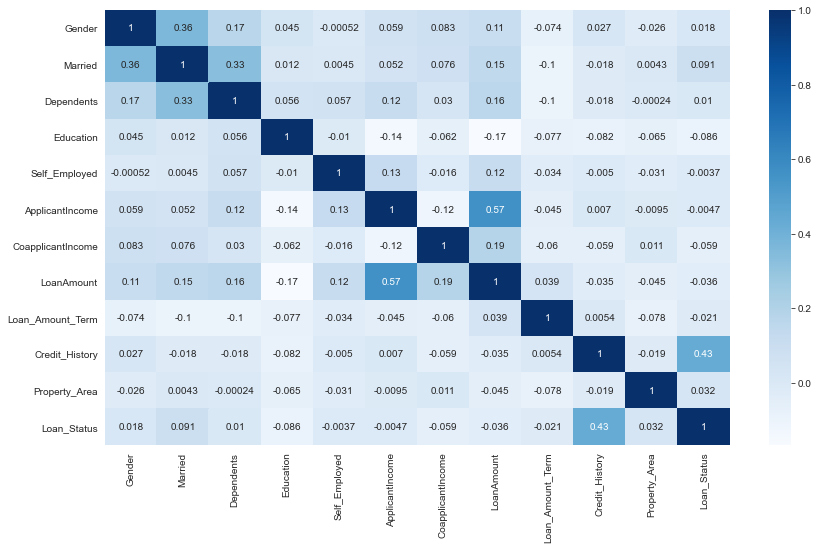

In [67]:

plt.figure(figsize=[14,8])
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [68]:
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.432616
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

Highest correlation with Loan_Status - Credit_History(0.432)

Lowest correlation with Loan_Status - Education(-0.085)

Plotting boxplot for checking outliers present in the dataset.

In [69]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

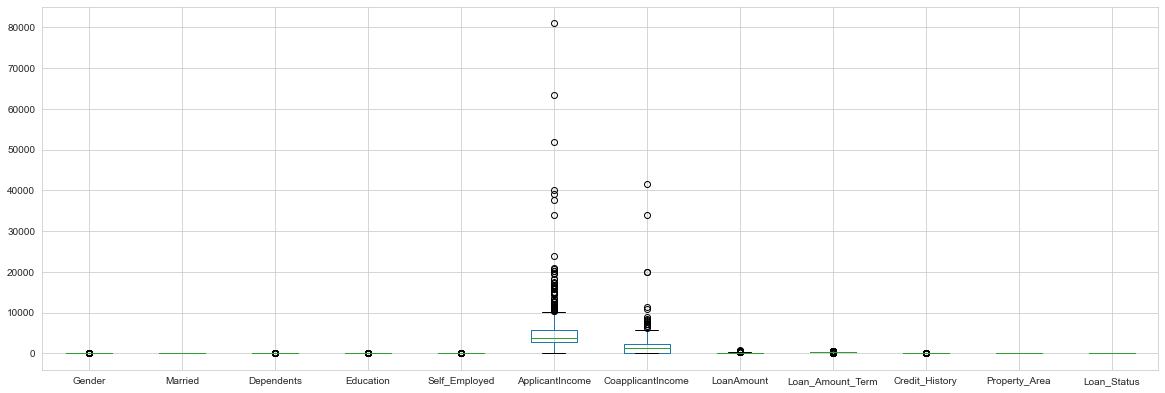

In [71]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

Their are outliers in some columns, which might affect model acuuracy, we will remove them.

In [73]:
from scipy.stats import zscore


In [74]:
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [75]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [76]:
df.shape

(614, 12)

In [77]:
df_new.shape

(577, 12)

In [78]:
(577/614)*100

93.97394136807817

As their is only 6% data loss, we can continue with new dataset df_new.

In [79]:
df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [80]:
#split the data in x and y

x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [81]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [82]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [87]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
Property_Area       -0.066196
dtype: float64

skewness is there in maximum column.

Distribution Check

<AxesSubplot:xlabel='Gender', ylabel='Density'>

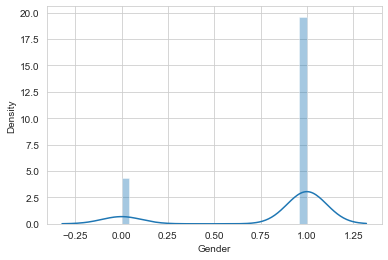

In [86]:
sns.distplot(x['Gender'])

In [ ]:
Data is Normally distributed and their is skewness.

<AxesSubplot:xlabel='Married', ylabel='Density'>

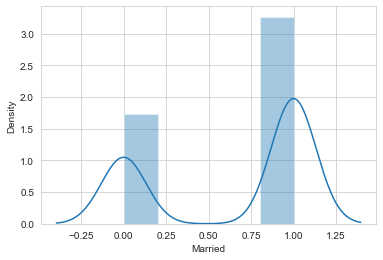

In [88]:
sns.distplot(x['Married'])

Data is normally distributed in different phases.

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

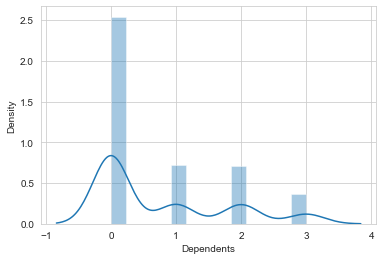

In [89]:
sns.distplot(x['Dependents'])

Data is normally distibuted in the beginning and their is skewness after.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

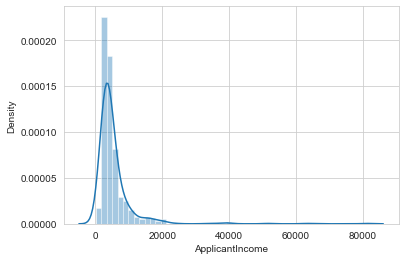

In [90]:
sns.distplot(x['ApplicantIncome'])

Data is right skewed.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

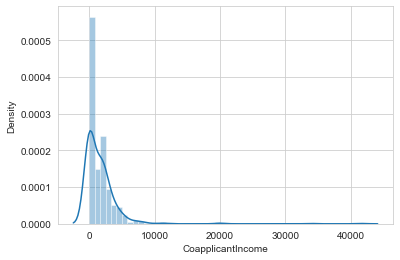

In [91]:
sns.distplot(x['CoapplicantIncome'])

Data is right skewed.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

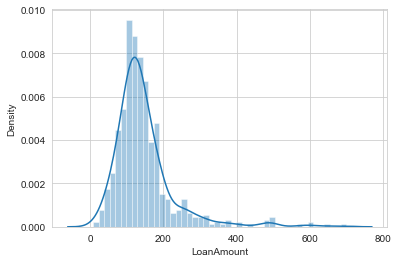

In [92]:
sns.distplot(x['LoanAmount'])

Data is not normally distributed as skewness is there.

In [93]:
from sklearn.preprocessing import power_transform

In [94]:
x_new=power_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)

In [95]:
x_new.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.310835
Property_Area       -0.158267
dtype: float64

Skewness is removed.

As this prediction is related to real world, we will use StandardScaler to scale the data.

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc=StandardScaler()


In [98]:
X=sc.fit_transform(x_new)
X

array([[ 0.47234264, -1.37208932, -0.82710431, ...,  0.18590509,
         0.54095432,  1.1935668 ],
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.54095432, -1.35000343],
       [ 0.47234264,  0.72881553, -0.82710431, ...,  0.18590509,
         0.54095432,  1.1935668 ],
       ...,
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.54095432,  1.1935668 ],
       [ 0.47234264,  0.72881553,  1.31670248, ...,  0.18590509,
         0.54095432,  1.1935668 ],
       [-2.11710719, -1.37208932, -0.82710431, ...,  0.18590509,
        -1.84858491,  0.00236103]])

Data is scaled.

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [102]:
#Finding the best random state

maxAccu = 0
BestRs= 0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,y_train)
    pred=LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        Bestrs=i
    
    
print("Best accuracy is",maxAccu,"on Random state",BestRs)    

Best accuracy is 0.8780487804878049 on Random state 0


We will create new train test split with random state(0)

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

In [105]:
def eval(j):
    mod=j
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Function is defined and we will pass Machine learning Models one by one.

In [106]:
eval(LogisticRegression())

0.7967479674796748
[[16 17]
 [ 8 82]]
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        33
           1       0.83      0.91      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.70      0.71       123
weighted avg       0.78      0.80      0.79       123



In [107]:
eval(SVC())

0.7967479674796748
[[17 16]
 [ 9 81]]
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        33
           1       0.84      0.90      0.87        90

    accuracy                           0.80       123
   macro avg       0.74      0.71      0.72       123
weighted avg       0.79      0.80      0.79       123



In [108]:
eval(RandomForestClassifier())

0.7642276422764228
[[17 16]
 [13 77]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        33
           1       0.83      0.86      0.84        90

    accuracy                           0.76       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.76      0.76      0.76       123



In [109]:
eval(DecisionTreeClassifier())

0.6341463414634146
[[14 19]
 [26 64]]
              precision    recall  f1-score   support

           0       0.35      0.42      0.38        33
           1       0.77      0.71      0.74        90

    accuracy                           0.63       123
   macro avg       0.56      0.57      0.56       123
weighted avg       0.66      0.63      0.64       123



We got different accuracies for different models, but it might be due to Overfitting, we will check with cross validation.

In [110]:
scr=cross_val_score(LogisticRegression(),X,y,cv=5)
print(scr.mean())

0.7687724910035986


In [111]:
scr=cross_val_score(SVC(),X,y,cv=5)
print(scr.mean())

0.7622417699586832


In [112]:
scr=cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
print(scr.mean())

0.6693589230974277


In [113]:
scr=cross_val_score(RandomForestClassifier(),X,y,cv=5)
print(scr.mean())

0.734599493535919


So, as the difference between cross val score and accuracy is less for "Logisticregression", we will select this model and perform Hyperparameter tuning.

In [147]:
parameters = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [148]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(X_train,y_train)
GCV.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [151]:
Final_mod=LogisticRegression(max_iter=100,penalty='l2',solver='lbfgs')

In [152]:
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print(accuracy_score(y_test,pred))

0.7967479674796748


We got accuracy as 80% for LogisticRegression Model.

In [153]:
#Model Saving
import joblib

In [154]:
joblib.dump(Final_mod,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']

In [157]:
#Loading the model
LG_mod=joblib.load("Loan_Prediction.pkl")